In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
# is this the correct step?
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine) 

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

2016-08-23


Text(0, 0.5, 'Inches')

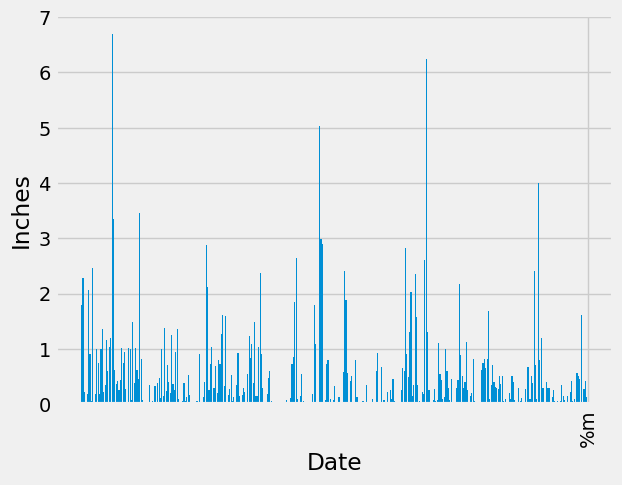

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
date_2016 = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
date_2016
print(date_2016)

# Perform a query to retrieve the data and precipitation scores

data_2016_17 = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= '2016-08-23').\
    filter(measurement.date <= '2017-08-23')
   

# Save the query results as a Pandas DataFrame. Explicitly set the column names

df_2016_17 = pd.DataFrame(data_2016_17, columns=['date', 'prcp'])
df_2016_17

# Sort the dataframe by date
data_2016_17 = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= '2016-08-23').\
    filter(measurement.date <= '2017-08-23').\
    order_by(measurement.date.desc()).all()


# Use Pandas Plotting with Matplotlib to plot the data - example from day 3.3 activity
x = df_2016_17.date
y = df_2016_17.prcp
plt.bar(df_2016_17['date'], df_2016_17['prcp'])
plt.xlabel("Date")
plt.xticks('%m', rotation=90)
plt.ylabel("Inches")

#df_2016_17.tight_layout()
#plt.show()

In [17]:
df_2016_17 = pd.DataFrame(data_2016_17, columns=['date', 'prcp'])
df_2016_17

,date,prcp
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00
...,...,...
2225,2016-08-23,0.05
2226,2016-08-23,NaN
2227,2016-08-23,0.02
2228,2016-08-23,1.79


In [13]:
# Print all of the player names in the database
date_prcp = session.query(df_2016_17)
for date in measurement:
    print(measurement.date)

ArgumentError: Column expression or FROM clause expected, got             date  prcp
0     2017-08-23  0.00
1     2017-08-23  0.00
2     2017-08-23  0.08
3     2017-08-23  0.45
4     2017-08-22  0.00
...          ...   ...
2225  2016-08-23  0.05
2226  2016-08-23   NaN
2227  2016-08-23  0.02
2228  2016-08-23  1.79
2229  2016-08-23  0.70

[2230 rows x 2 columns].

In [35]:
# Use Pandas to calculate the summary statistics for the precipitation data
count_value = df_2016_17['prcp'].count()
mean_value = df_2016_17['prcp'].mean()
std_value = df_2016_17['prcp'].std()
min_value = df_2016_17['prcp'].min()
quartile_1_value = df_2016_17.quantile([.25])
quartile_2_value = df_2016_17.quantile([.5])
quartile_3_value = df_2016_17.quantile([.75])
max_value = df_2016_17['prcp'].max()

    
summary_values = [count_value, mean_value, std_value, min_value, quartile_1_value, quartile_2_value, quartile_3_value, max_value]
summary_labels = ["count", "mean", "std", "min", "25%", "50%", "75%", "max"]

# Create a DataFrame using a dictionary with summary_labels as keys and summary_values as values
summary_table = pd.DataFrame({"Summary Stat": summary_labels, "Precipitation": summary_values})
summary_table

/var/folders/s2/xh66s_3s7hq6cc3bmyv39k8r0000gn/T/ipykernel_85273/2824436500.py:6: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  quartile_1_value = df_2016_17.quantile([.25])
/var/folders/s2/xh66s_3s7hq6cc3bmyv39k8r0000gn/T/ipykernel_85273/2824436500.py:7: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  quartile_2_value = df_2016_17.quantile([.5])
/var/folders/s2/xh66s_3s7hq6cc3bmyv39k8r0000gn/T/ipykernel_85273/2824436500.py:8: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warni

,Summary Stat,Precipitation
0,count,2021
1,mean,0.177279
2,std,0.46119
3,min,0.0
4,25%,prcp 0.25 0.0
5,50%,prcp 0.5 0.02
6,75%,prcp 0.75 0.13
7,max,6.7


# Exploratory Station Analysis

In [50]:
# Design a query to calculate the total number of stations in the dataset
session.query(measurement.station).distinct().count()

9

In [93]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_activity = session.query(measurement.station, func.count(measurement.station).label('count')).\
                          group_by(measurement.station).\
                          order_by(func.count(measurement.station).desc()).all()


most_active = session.query(measurement.station, func.count(measurement.station).label('count')).\
                          group_by(measurement.station).\
                          order_by(func.count(measurement.station).desc()).first()

print('The most active station is', most_active, '.')
station_activity

The most active station is ('USC00519281', 2772) .


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [105]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = 'USC00519281'

min_max_avg_temp = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
                filter(measurement.station == most_active_station).all()

min_max_avg_temp

[(54.0, 85.0, 71.66378066378067)]

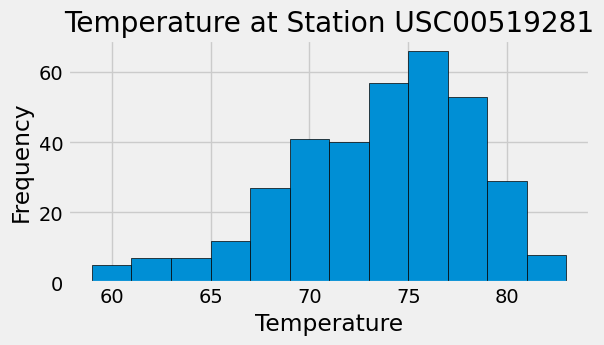

In [131]:
temp_2016_17 = session.query(measurement.station, measurement.tobs).\
    filter(measurement.date >= '2016-08-23').\
    filter(measurement.date <= '2017-08-23').\
    filter(measurement.station == most_active_station).all()

temp_2016_17 = pd.DataFrame(temp_2016_17, columns=['date','tobs'])
temp_2016_17


plt.figure(figsize=(6, 3))
plt.hist(temp_2016_17['tobs'], bins=12, edgecolor='black')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title(f'Temperature at Station {most_active_station}')
plt.show()

Text(0.5, 4.183333333333314, 'Temperature')

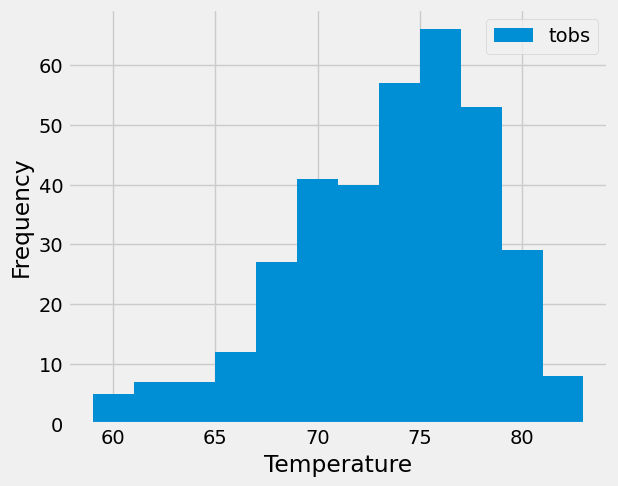

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()